In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_salary= pd.read_csv('data/linkeding-jobs-usa-clean.csv')

In [5]:
df_salary['salary_num'] = df_salary['salary_num'].round(0).astype(int)


In [6]:
df_salary.head()

,title,company,description,onsite_remote,location,criteria,posted_date,link,salary_num
0,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,https://www.linkedin.com/jobs/view/data-analys...,100000
1,Data Analyst,"Eva Garland Consulting, LLC","Reporting to the Director of Operations, the D...",onsite,"Raleigh, NC","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...,50000
2,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,https://www.linkedin.com/jobs/view/data-analys...,100000
3,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,https://www.linkedin.com/jobs/view/data-analys...,100000
4,Data Analyst,London Approach,The ideal candidate for the Data Analyst/Finan...,onsite,"Franklin, TN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-21,https://www.linkedin.com/jobs/view/data-analys...,100000


1. Análisis general de salarios

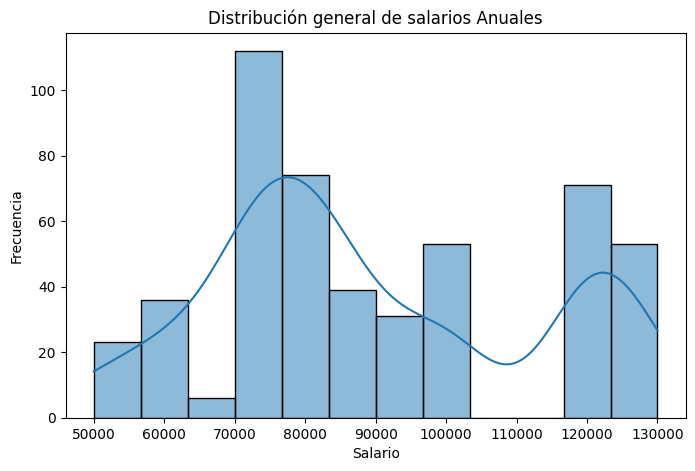

count       498.000000
mean      89169.196787
std       22625.837194
min       50000.000000
25%       73036.000000
50%       80000.000000
75%      100000.000000
max      130000.000000
Name: salary_num, dtype: float64


In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df_salary['salary_num'], kde=True)
plt.title('Distribución general de salarios Anuales')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas básicas
print(df_salary['salary_num'].describe())


2. Análisis por puesto

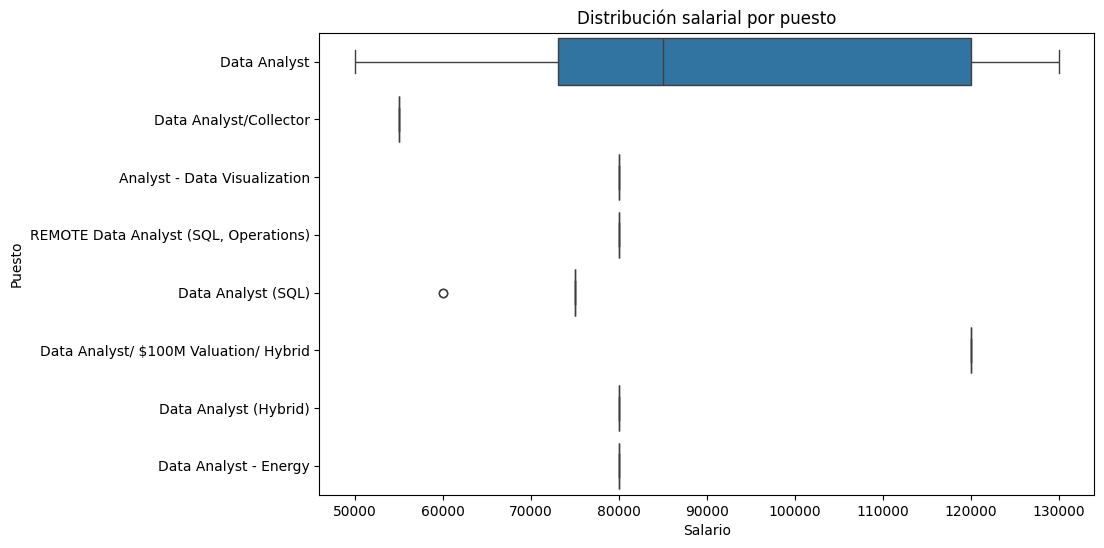

title
Data Analyst/ $100M Valuation/ Hybrid    120000.00000
Data Analyst                              90894.12037
Data Analyst (Hybrid)                     80000.00000
Analyst - Data Visualization              80000.00000
REMOTE Data Analyst (SQL, Operations)     80000.00000
Data Analyst - Energy                     80000.00000
Data Analyst (SQL)                        73800.00000
Data Analyst/Collector                    55000.00000
Name: salary_num, dtype: float64


In [8]:
top_titles = df_salary['title'].value_counts().head(10).index
title_salary = df_salary[df_salary['title'].isin(top_titles)]

plt.figure(figsize=(10,6))
sns.boxplot(data=title_salary, x='salary_num', y='title')
plt.title('Distribución salarial por puesto')
plt.xlabel('Salario')
plt.ylabel('Puesto')
plt.show()

# Promedios por puesto
avg_salary_title = df_salary.groupby('title')['salary_num'].mean().sort_values(ascending=False).head(10)
print(avg_salary_title)


los salarios van de $55K a $120K, concentrándose entre $80K y $100K. Los roles híbridos o especializados (como SQL o Data Visualization) se ubican en el rango medio-alto, destacando Data Analyst / $100M  como el mejor pagado.


3. Análisis por empresa

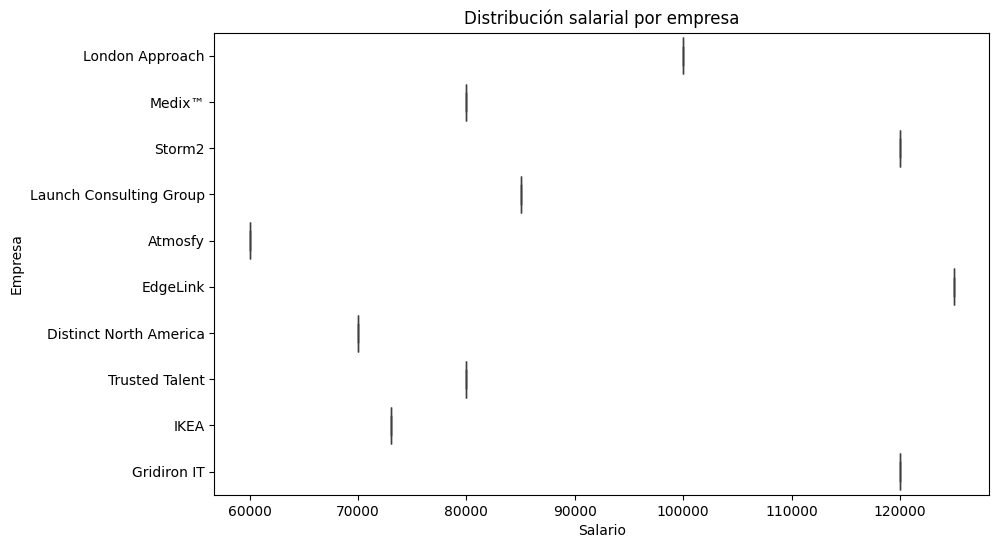

company
EdgeLink                         125000.000000
Insight Global                   123055.555556
Gridiron IT                      120000.000000
Storm2                           120000.000000
London Approach                  100000.000000
KLA                              100000.000000
1872 Consulting                  100000.000000
Apex Systems                      90000.000000
The Randy Neuringer Co., LLC.     90000.000000
Launch Consulting Group           85000.000000
Name: salary_num, dtype: float64


In [9]:
top_companies = df_salary['company'].value_counts().head(10).index
company_salary = df_salary[df_salary['company'].isin(top_companies)]

plt.figure(figsize=(10,6))
sns.boxplot(data=company_salary, x='salary_num', y='company')
plt.title('Distribución salarial por empresa')
plt.xlabel('Salario')
plt.ylabel('Empresa')
plt.show()

# Promedio por empresa
avg_salary_company = df_salary.groupby('company')['salary_num'].mean().sort_values(ascending=False).head(10)
print(avg_salary_company)


Por empresa: los salarios varían según la compañía; las más consolidadas o tecnológicas, como EdgeLink e Insight Global, ofrecen los mejores sueldos (más de $120K), mientras que otras se mantienen alrededor de $70K.


4. Análisis por ubicación

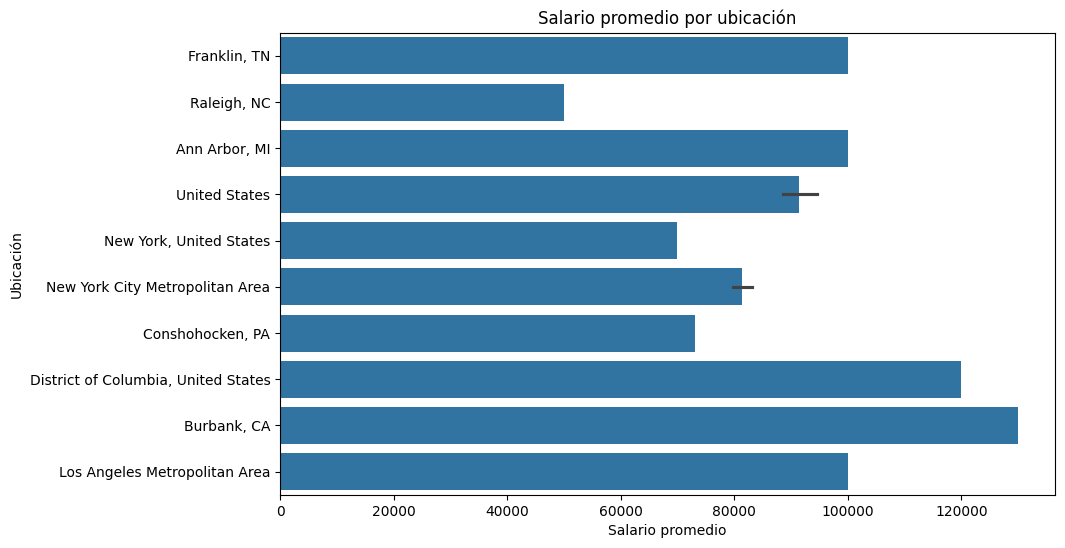

In [10]:
top_locations = df_salary['location'].value_counts().head(10).index
location_salary = df_salary[df_salary['location'].isin(top_locations)]

plt.figure(figsize=(10,6))
sns.barplot(data=location_salary, x='salary_num', y='location', estimator='mean')
plt.title('Salario promedio por ubicación')
plt.xlabel('Salario promedio')
plt.ylabel('Ubicación')
plt.show()


Por ubicación: las ciudades con mayor costo de vida y concentración tecnológica (como Burbank, CA o Washington D.C.) ofrecen los salarios más altos, superando los $120,000 USD, mientras que lugares como Raleigh, NC o Ann Arbor, MI rondan entre $70K y $90K.


5. Análisis por modalidad de trabajo

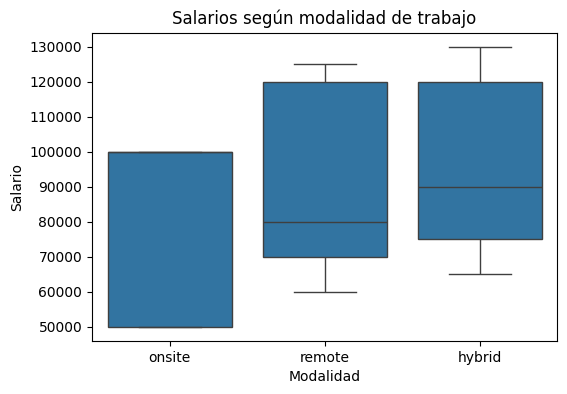

onsite_remote
hybrid    92818.106509
onsite    84315.068493
remote    88144.531250
Name: salary_num, dtype: float64


In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_salary, x='onsite_remote', y='salary_num')
plt.title('Salarios según modalidad de trabajo')
plt.xlabel('Modalidad')
plt.ylabel('Salario')
plt.show()

print(df_salary.groupby('onsite_remote')['salary_num'].mean())


Por modalidad: los empleos remotos e híbridos presentan mejores sueldos promedio ($88K–$93K) que los presenciales ($84K), reflejando que la flexibilidad laboral está asociada con mejores compensaciones.


6. Tendencias temporales

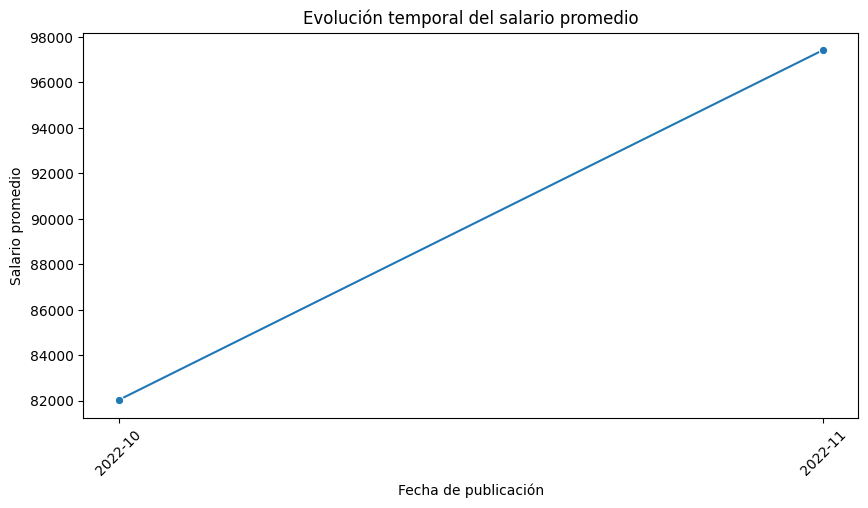

In [ ]:
df_salary['posted_date'] = pd.to_datetime(df_salary['posted_date'], errors='coerce')
df_salary['month_year'] = df_salary['posted_date'].dt.to_period('M')

salary_trend = df_salary.groupby('month_year')['salary_num'].mean().reset_index()
# Convertir a numérico
salary_trend['salary_num'] = pd.to_numeric(salary_trend['salary_num'], errors='coerce')

# Convertir month_year a string (para graficar correctamente en el eje X)
salary_trend['month_year'] = salary_trend['month_year'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=salary_trend, x='month_year', y='salary_num', marker='o')
plt.title('Evolución temporal del salario promedio')
plt.xlabel('Fecha de publicación')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)
plt.show()


El salario de un Data Analyst depende principalmente de la ubicación, la modalidad de trabajo, la empresa y el tipo de puesto. Los roles híbridos, especializados y en ciudades o empresas tecnológicas tienden a ofrecer las mejores oportunidades salariales.